In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import AidUtilities as aid_utils
import AidUtilities.utilities as utils

In [4]:
data_path = '/home/gsandoval/Documents/Classes/depaul/Korea/Data/'+\
            'WorldBank_GDP/LatinAmericaKorea_GDP_BySeries/LatAmKorea_GDP_Data.txt'
gdp_data = pd.read_csv(data_path, sep='\t', skipfooter=5)

In [5]:
gdp_data = utils.clean_col_names(gdp_data)

In [6]:
new_series_names = [
    'AggForestFish_PctGDP', 'GovtDebt_Total', 'CoalRents_PctGDP',
    'HealthExp_PctGDP', 'Cred2Private_PctGDP', 'GovtHealth_PctGDP',
    'ExportsGoodServices_PctGDP', 'FinalConsumpExp_PctGDP', 'ForeignInvstOutflow_PctGDP',
    'GDP_2015USD', 'GDP_LCU_current', 'GDP_PctGrowth', 'PerCapita_GDP_LCU',
    'PerCapita_GDP_USD', 'PerEmployed_GDP_2017PPP', 'EnergyUnit_GDP_PPP',
    'GovtConsumption_PctGDP', 'DomSavings_PctGDP', 'Savings_PctGDP',
    'ImportGoodService_PctGDP', 'Inflation_Pct', 'Manufacturing_PctGDP',
    'MerchTrade_PctGDP', 'Mineral_PctGDP', 'NatGas_PctGDP',
    'Lend(+)Borrow(-)_PctGDP', 'Remittance_PctGDP', 'RevenueExGrants_PctGDP',
    'StocksTraded_PctGDP', 'NatResourcRents_PctGDP', 'InServiceTrade_PctGDP',
    'BroadMoney_PctGDP', 'CurrentAcctBal_PctGDP', 'CreditByFin_PctGDP', 'CreditByBanks_PctGDP',
    'Expense_PctGDP', 'ForeignInvstInflow_PctGDP', 'ForestRents_PctGDP',
    'GDP_LCU', 'GDP_USD', 'PerCapita_GDP_2015USD', 'PerCapita_GDP_LCU_current',
    'GDPGrowth_Pct', 'EducExp_PctGDP', 'Industry_PctGDP',
    'Defense_PctGDP', 'OilRents_PctGDP', 'RnD_PctGDP',
    'Services_PctGDP', 'Trade_PctGDP', 'TaxRev_PctGDP']

In [9]:
# Replace default series names with new custom ones
series_names = gdp_data.Series_Name.unique()
series_codes = gdp_data.Series_Code.unique()
series_pairs = [(a, b) for a, b in zip(series_names, new_series_names)]
for a, b in series_pairs:
    gdp_data.loc[gdp_data['Series_Name']==a, 'Series_Name'] = b

In [10]:
print(len(gdp_data.Series_Name.unique()))

51


# Focus On Korea

We will focus on examining Korea's GDP makeup over the years.
Korea should be the case study for steps Developing countries should do to grow into a Developed country as they are the only country to be reclassified from Developing to Developed within the last 20 years.

Perhaps one should focus on understanding the steps Korea took to grow into a developed country.

In this section we will look at the correlation of GDP components and their correlation to overall GDP.  The GDP of Korea has grown significantly over the decades.  Looking at the correlation of GDP components may reveal which ones played a significant role in growing GDP. 


In [11]:
# Filter for just korea data
korea_data = gdp_data.loc[gdp_data['Country_Name']=="Korea, Rep."]

In [12]:
# Drop non essential columns
korea_data.drop(['Series_Code', 'Country_Code', 'Country_Name'], axis=1, inplace=True)
# Reset index to allow for easy Transpose
korea_data.set_index('Series_Name', inplace=True)


In [13]:
# Transpose data to simply for plotting
tkorea_data = korea_data.T

In [14]:
tkorea_data.describe()

Series_Name,AggForestFish_PctGDP,GovtDebt_Total,CoalRents_PctGDP,HealthExp_PctGDP,Cred2Private_PctGDP,GovtHealth_PctGDP,ExportsGoodServices_PctGDP,FinalConsumpExp_PctGDP,ForeignInvstOutflow_PctGDP,GDP_2015USD,...,PerCapita_GDP_LCU_current,GDPGrowth_Pct,EducExp_PctGDP,Industry_PctGDP,Defense_PctGDP,OilRents_PctGDP,RnD_PctGDP,Services_PctGDP,Trade_PctGDP,TaxRev_PctGDP
count,61.000000,13.000000,49.000000,20.000000,61.000000,20.000000,61.000000,61.000000,50.000000,6.100000e+01,...,6.100000e+01,60.000000,29.000000,61.000000,61.000000,49.000000,23.000000,61.000000,61.000000,48.000000
mean,13.422753,19.016631,0.085178,5.716182,67.490742,3.295436,27.904744,71.359701,0.888469,5.857699e+11,...,1.089791e+07,5.931253,3.474865,30.963622,3.958356,0.000316,3.032340,46.772442,57.430502,13.545178
std,12.779859,13.971548,0.158129,1.209867,46.410826,0.757400,13.144544,10.831589,0.806586,5.360306e+11,...,1.242666e+07,3.811507,0.805926,5.550134,1.463963,0.000563,0.830691,7.307252,21.698412,0.996754
min,1.667931,6.862980,0.000129,3.897594,5.743216,1.961563,2.621468,58.795080,0.009206,2.569943e+10,...,9.989456e+03,-5.811820,2.089250,17.329705,2.315474,0.000000,2.015670,29.849394,14.600176,10.475277
25%,2.619976,8.178937,0.001236,4.570272,34.280526,2.598177,23.654802,63.639549,0.203046,1.025125e+11,...,2.988487e+05,2.886108,3.018310,27.624699,2.499300,0.000000,2.262760,39.930630,48.759426,12.985778
50%,7.606496,9.993846,0.006678,5.849817,48.637518,3.466847,27.885682,66.331084,0.641400,4.014878e+11,...,4.678319e+06,6.033830,3.374240,33.220965,4.002304,0.000000,2.872580,46.486521,57.523038,13.477852
75%,24.172043,34.929859,0.084634,6.518965,112.651109,3.737489,36.445859,77.607512,1.786544,1.021193e+12,...,1.987043e+07,8.587972,3.739180,34.734840,4.878716,0.000384,3.900820,53.878916,69.215521,14.311736
max,46.526876,38.065514,0.610769,8.164165,164.779234,4.860005,54.094051,99.371648,2.466779,1.637850e+12,...,3.733354e+07,12.884442,6.329670,37.147720,7.157548,0.001778,4.527530,57.242151,105.566314,15.536384


## Run the following tow cells if you wish to see plots of the individual series.

In [ ]:
for col in columns[25:]:
    fig, ax = plt.subplots()
    tkorea_data[col].plot(ax=ax, title=col)
    count += 1

In [ ]:
for col in columns[25:]:
    fig, ax = plt.subplots()
    tkorea_data[col].plot(ax=ax, title=col)
    count += 1

In [15]:
# Select specific series to focus on. 
# The process to select these was done in a different notebook.

select_series = ['AggForestFish_PctGDP', 'CoalRents_PctGDP',
       'ExportsGoodServices_PctGDP', 'FinalConsumpExp_PctGDP',
       'PerCapita_GDP_USD',
       'ImportGoodService_PctGDP', 'Manufacturing_PctGDP',
       'Mineral_PctGDP', 'Remittance_PctGDP',
       'NatResourcRents_PctGDP', 'CurrentAcctBal_PctGDP', 
       'CreditByBanks_PctGDP', 'ForestRents_PctGDP',
       'Industry_PctGDP', 'Services_PctGDP', 'Trade_PctGDP',
       'GDP_USD']

# Not needed in correlation plot 'GDPGrowth_Pct', 

In [16]:
data = tkorea_data[select_series]
print(f'Num of years: {data.shape[0]}')
data.isna().sum()

Num of years: 61


Series_Name
AggForestFish_PctGDP           0
CoalRents_PctGDP              12
ExportsGoodServices_PctGDP     0
FinalConsumpExp_PctGDP         0
PerCapita_GDP_USD              0
ImportGoodService_PctGDP       0
Manufacturing_PctGDP           0
Mineral_PctGDP                11
Remittance_PctGDP             16
NatResourcRents_PctGDP        11
CurrentAcctBal_PctGDP         16
CreditByBanks_PctGDP           0
ForestRents_PctGDP            11
Industry_PctGDP                0
Services_PctGDP                0
Trade_PctGDP                   0
GDP_USD                        0
dtype: int64

As we can see from the above output, we do have 61 years of values for the majority of the series.

Before we plot the correlation data, let's take a look at a plot of GDP.

We want to have a guage of the overall trend in the GDP. 

<AxesSubplot:>

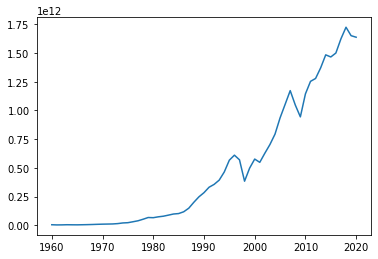

In [22]:
data.GDP_USD.plot()

Let's observe how the GDP gre year over year. The below chart if the percent change of GDP year over year.  

<AxesSubplot:>

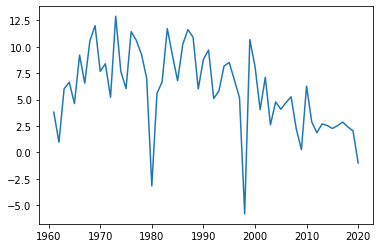

In [25]:
tkorea_data.GDPGrowth_Pct.plot()

In [26]:
corr_data = data.corr()

[Text(0.5, 1.0, 'Correlation Plot')]

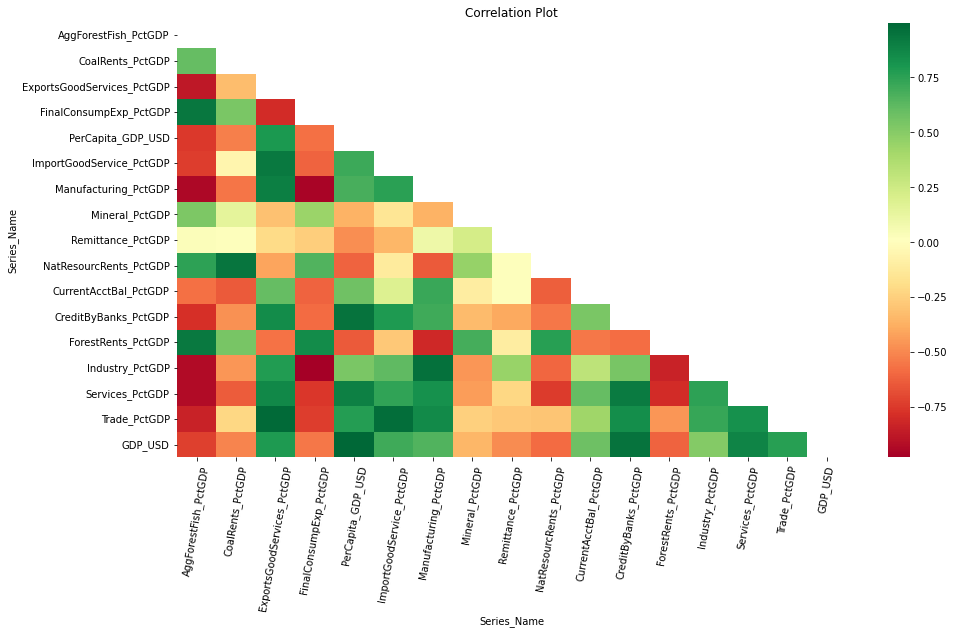

In [36]:
mask = np.zeros_like(corr_data)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15, 8))
corr_plot = sns.heatmap(corr_data, cmap='RdYlGn', mask = mask)#.set(title='Correlation Plot')
corr_plot.set_xticklabels(corr_plot.get_xticklabels(), rotation=80)
corr_plot.set(title='Correlation Plot')

## Thoughts on the correlation

I want to draw your focus on the last row of the above column. 
It is the row of Korea's GDP to the other variables.

We can see that the variables with the greatest positive correlation are:

- GDP Per Capita 
- Credit by Banks
- Services 
- Exports of Goods and Services
- Manufacturing
- Industry

The series with the lowest correlation are:

- Rents from Aggriculture, Forrest, and Fishing
- Natural Resources Rents
- Forest Rents

It may be important to note that manufacturing and industry are highly correlated with Korea's growing GDP. If a country wants to become developed, perhaps these are very good GDP contributors to focus on.

# Latin America Correlation of GDP

In [195]:
manufacturing = gdp_data[gdp_data.Series_Name=="Manufacturing_PctGDP"]

In [196]:
manufacturing.shape

(21, 65)

In [197]:
manufacturing.head()

,Series_Name,Series_Code,Country_Name,Country_Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
441,Manufacturing_PctGDP,NV.IND.MANF.ZS,Argentina,ARG,NaN,NaN,NaN,NaN,NaN,41.18416,...,15.850698,15.216801,15.011054,14.772779,14.181585,13.488026,12.835168,14.060143,14.469857,15.369207
442,Manufacturing_PctGDP,NV.IND.MANF.ZS,Belize,BLZ,NaN,NaN,NaN,NaN,NaN,NaN,...,13.719762,12.447033,10.179942,8.813064,7.056821,6.686225,6.760656,5.479885,6.135547,7.437908
443,Manufacturing_PctGDP,NV.IND.MANF.ZS,Bolivia,BOL,NaN,NaN,NaN,NaN,NaN,NaN,...,10.338464,10.214209,9.927811,9.738328,10.191191,10.984222,10.493508,10.343151,10.489504,10.844372
444,Manufacturing_PctGDP,NV.IND.MANF.ZS,Brazil,BRA,22.619394,24.271078,24.813741,26.868882,24.674107,22.64486,...,11.783798,10.675942,10.479612,10.337097,10.520937,10.786451,10.721498,10.528457,10.141004,9.769890
445,Manufacturing_PctGDP,NV.IND.MANF.ZS,Cayman Islands,CYM,NaN,NaN,NaN,NaN,NaN,NaN,...,0.754645,0.782351,0.793862,0.826452,0.831096,0.859684,0.849128,0.892137,0.907311,NaN


In [198]:
# Drop non essential columns
manufacturing.drop(['Series_Name', 'Series_Code', 'Country_Code'], axis=1, inplace=True)
# Reset index to allow for easy Transpose
manufacturing.set_index('Country_Name', inplace=True)

In [199]:
# Transpose data to simply for plotting
manufacturing = manufacturing.T

In [200]:
manufacturing.drop(['Cayman Islands', 'Puerto Rico'], axis=1, inplace=True)

<AxesSubplot:>

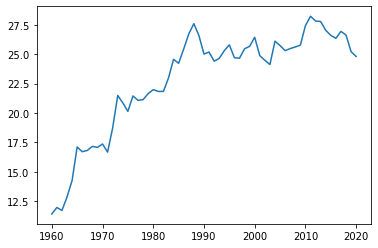

In [201]:
manufacturing['Korea, Rep.'].plot()

<AxesSubplot:>

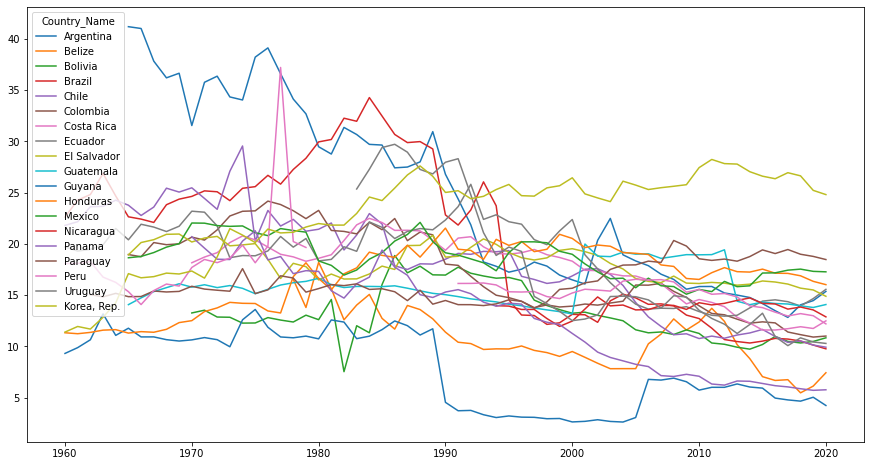

In [181]:
manufacturing.plot(figsize=(15, 8))

In [193]:
manufacturing_corr = manufacturing.corr()

[Text(0.5, 1.0, 'Correlation Plot')]

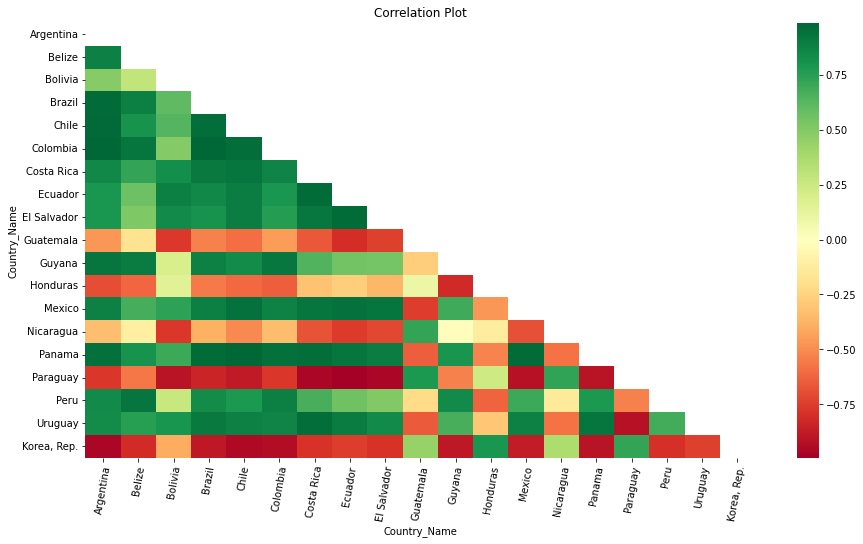

In [194]:
mask = np.zeros_like(country_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15, 8))
corr_plot = sns.heatmap(manufacturing_corr, cmap='RdYlGn', mask = mask)#.set(title='Correlation Plot')
corr_plot.set_xticklabels(corr_plot.get_xticklabels(), rotation=80)
corr_plot.set(title='Correlation Plot')

# Correlation of Manufacturing by Country

Knowing that Manufacturing may be an important part of GDP growth, we look at the correlation of manufacturing within Latin America countries.

We see that Korea has a mostly negative correlation with the manufacturing of all Latin America countries. 
It is interesting to see the level of negative correlation that is present. 


# Next Steps

We will continue to explore the GDP contributers in Korea becoming a developed nation.  Perhaps this is the key to understanding how foreign aid may be directed.
